In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
## Feature selection using Boruta
from BorutaShap import BorutaShap
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
data = pd.read_csv('fn_emx1_all_features_withlabels.csv')
data.head()

,States,Label,System,sys_labels,fn_all_bp20_shear,fn_all_bp20_stretch,fn_all_bp20_stagger,fn_all_bp20_buckle,fn_all_bp20_propeller,fn_all_bp20_opening,...,Fn-hy-HNH_native,Fn-hy-HNH_non-native,Fn-hy-REC1_native,Fn-hy-REC1_non-native,Fn-hy-REC2_native,Fn-hy-REC2_non-native,Fn-hy-REC3_native,Fn-hy-REC3_non-native,Fn-hy-RuvC_native,Fn-hy-RuvC_non-native
0,3,Fn_native-1,Fn_native,0,-0.2235,-0.1560,0.1115,-5.2780,-6.1620,-2.6378,...,203,0,595,0,1793,0,948,0,177,0
1,3,Fn_native-2,Fn_native,0,-0.0246,-0.0426,0.0525,-1.9449,-9.4976,-0.4529,...,149,50,459,131,1415,445,743,255,140,55
2,3,Fn_native-3,Fn_native,0,-0.6886,-0.2216,-0.3474,-9.1124,-10.7522,0.9964,...,133,37,457,182,1387,550,712,288,140,46
3,3,Fn_native-4,Fn_native,0,-0.2224,-0.1921,-0.4324,-13.3789,-32.2909,0.1517,...,96,37,473,138,1340,626,675,354,135,65
4,3,Fn_native-5,Fn_native,0,-0.4906,0.0171,-0.6700,-19.3168,-12.3558,3.4286,...,114,23,443,170,1355,665,682,359,134,48


In [7]:
data=data.drop(['Label','System','sys_labels'], axis=1)
data.head()

,States,fn_all_bp20_shear,fn_all_bp20_stretch,fn_all_bp20_stagger,fn_all_bp20_buckle,fn_all_bp20_propeller,fn_all_bp20_opening,fn_all_bp19_shear,fn_all_bp19_stretch,fn_all_bp19_stagger,...,Fn-hy-HNH_native,Fn-hy-HNH_non-native,Fn-hy-REC1_native,Fn-hy-REC1_non-native,Fn-hy-REC2_native,Fn-hy-REC2_non-native,Fn-hy-REC3_native,Fn-hy-REC3_non-native,Fn-hy-RuvC_native,Fn-hy-RuvC_non-native
0,3,-0.2235,-0.1560,0.1115,-5.2780,-6.1620,-2.6378,0.8102,0.1117,0.0089,...,203,0,595,0,1793,0,948,0,177,0
1,3,-0.0246,-0.0426,0.0525,-1.9449,-9.4976,-0.4529,0.6822,0.1572,0.4577,...,149,50,459,131,1415,445,743,255,140,55
2,3,-0.6886,-0.2216,-0.3474,-9.1124,-10.7522,0.9964,0.8532,-0.0798,0.4607,...,133,37,457,182,1387,550,712,288,140,46
3,3,-0.2224,-0.1921,-0.4324,-13.3789,-32.2909,0.1517,0.0591,-0.0899,0.1444,...,96,37,473,138,1340,626,675,354,135,65
4,3,-0.4906,0.0171,-0.6700,-19.3168,-12.3558,3.4286,0.3124,0.0721,-0.6816,...,114,23,443,170,1355,665,682,359,134,48


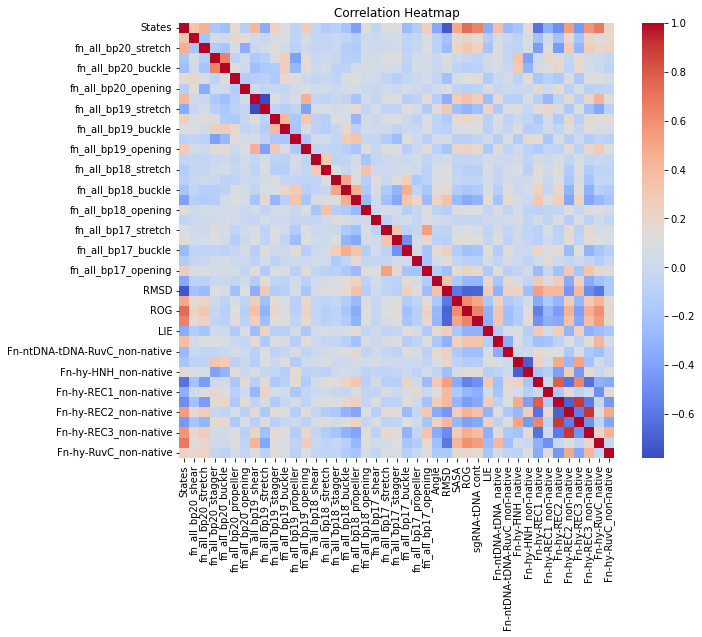

In [8]:
correlation_matrix = data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


In [9]:
# Step 1: Prepare the data
# dropping the rows having NaN values
data = data.dropna()
 
# To reset the indices
data = data.reset_index(drop=True)
X = data.iloc[:, 1:]  
y = data['States']    # Assuming 'states' is the target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1]:
import pickle
with open('Feature_Selector_data_fncas9','rb') as f: 
    boruta_fn_all= pickle.load(f)
with open('Feature_Selector_dna_fncas9','rb') as f: 
    boruta_fn_dna= pickle.load(f)
    
with open('Feature_Selector_prot_fncas9_2','rb') as f:
    boruta_fn_prot=pickle.load(f)

/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


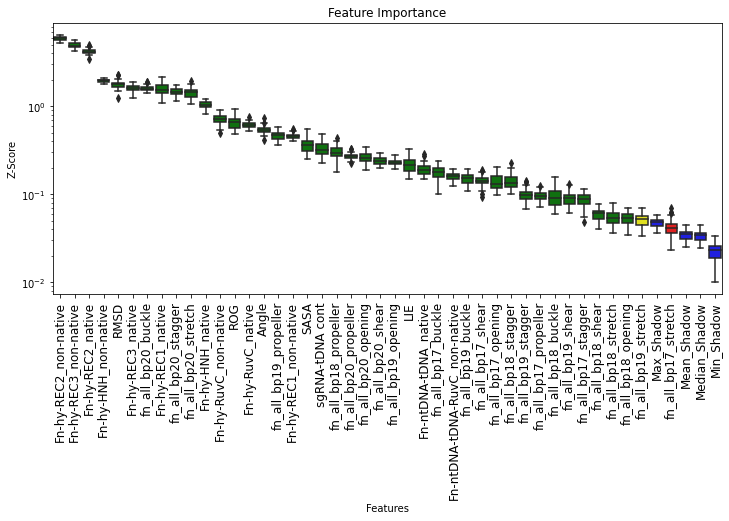

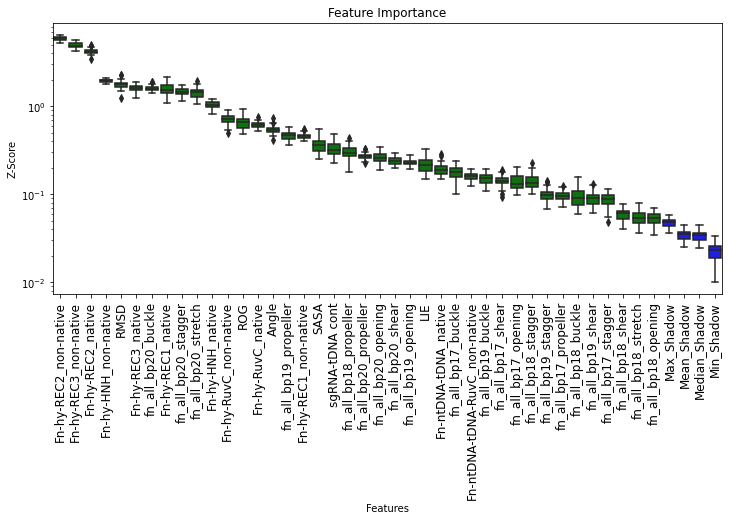

In [12]:
# Features selected for all
# Returns Boxplot of features
boruta_fn_all.plot(X_size=12, figsize=(12,5),
            y_scale='log', which_features='all')
boruta_fn_all.plot(X_size=12, figsize=(12,5),
            y_scale='log', which_features='accepted')

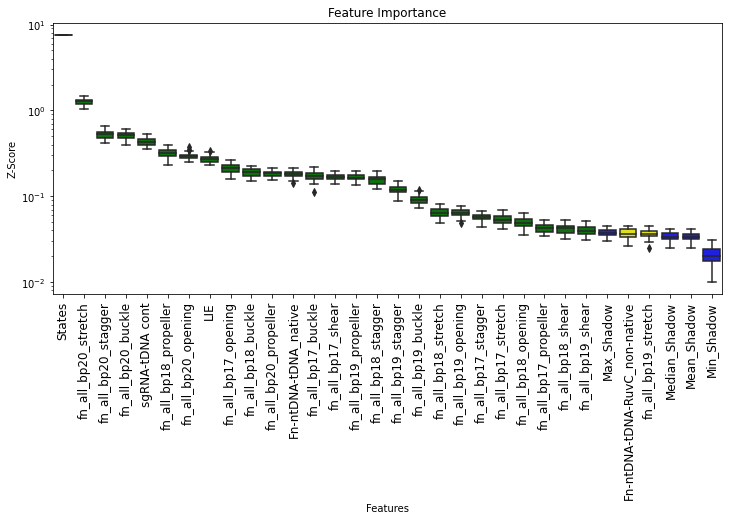

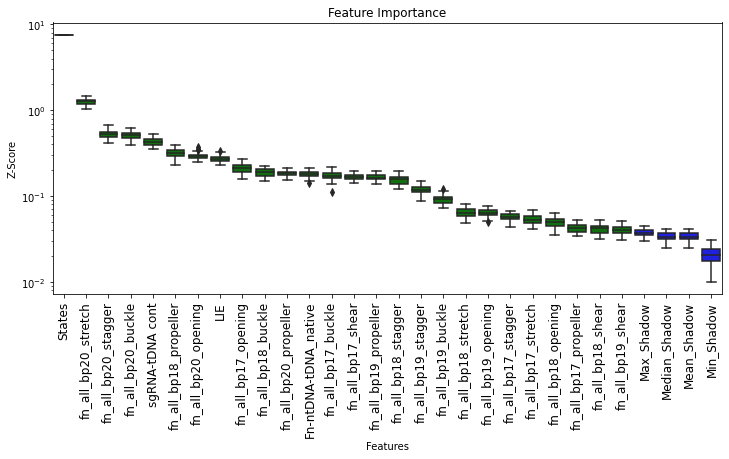

[]


In [16]:
# Features selected for all
# Returns Boxplot of features
boruta_fn_dna.plot(X_size=12, figsize=(12,5),
            y_scale='log', which_features='all')
boruta_fn_dna.plot(X_size=12, figsize=(12,5),
            y_scale='log', which_features='accepted')
print(boruta_fn_dna.features_to_remove)
dna_subset = boruta_fn_dna.Subset()

In [17]:
dna_subset

,fn_all_bp19_propeller,Fn-ntDNA-tDNA_native,fn_all_bp19_shear,fn_all_bp17_propeller,fn_all_bp18_stagger,fn_all_bp17_stagger,fn_all_bp18_opening,fn_all_bp17_opening,fn_all_bp18_stretch,fn_all_bp17_buckle,...,fn_all_bp20_buckle,fn_all_bp18_buckle,LIE,sgRNA-tDNA cont,fn_all_bp20_stagger,fn_all_bp20_propeller,States,fn_all_bp20_opening,fn_all_bp18_propeller,fn_all_bp19_opening
50239,18.3500,343,0.2400,-20.9700,-0.1200,-1.1200,-0.8100,6.4800,0.1700,34.7200,...,-4.1300,35.2900,-410.0010,632.0,-0.5000,-18.1500,1,14.3900,14.5400,-8.0100
33231,-3.8507,322,0.0052,-7.3111,-0.2741,-1.0811,-1.3879,8.3839,-0.1660,-1.0382,...,-12.5705,9.4909,-452.4573,674.0,-0.8177,4.9969,3,-1.7846,-11.4391,-4.6107
43650,-0.5619,337,0.2641,-13.4788,-0.5387,0.1590,-2.9250,17.9479,-0.1099,-3.8561,...,-20.6091,-3.5647,-458.8838,702.0,-0.1641,-9.2743,3,-8.7081,-18.6731,3.2545
38836,-4.7369,308,0.6162,-21.7411,-0.9574,-0.5586,1.9307,13.7578,-0.1106,-22.5135,...,-37.2419,-26.7250,-433.8120,656.0,-0.9802,-27.4461,3,5.0804,-21.8295,-6.3110
2388,2.5035,352,-0.2936,-14.7552,-0.3286,-0.1554,1.3293,0.5698,0.0088,-11.1967,...,-10.2132,9.2225,-450.3133,675.0,-0.4708,-9.0658,2,-0.4881,-1.6209,2.0433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3.3837,371,0.0006,-8.6031,0.1292,-0.8834,-0.4725,10.9378,-0.1035,15.4200,...,-6.3721,15.9939,-437.6163,696.0,-0.1634,1.2125,2,6.6856,2.7380,-4.5912
44732,-5.5938,337,0.0289,-18.3620,-0.3569,-0.8004,4.9483,6.2273,-0.0184,5.8487,...,-1.8828,3.2311,-452.9091,643.0,-0.0435,-0.7602,3,-3.7980,-10.5564,-5.3009
38158,4.7446,297,-0.1459,-15.7882,-0.4733,-0.7406,2.3548,5.7456,-0.2809,14.7438,...,-16.9829,7.4215,-445.0587,708.0,-0.2712,-18.8301,3,2.7816,-6.2095,4.2263
860,-10.2218,349,0.2673,-23.0556,-0.0564,-1.1481,-0.7889,13.5627,-0.0614,16.6919,...,3.4269,6.4565,-426.7430,629.0,0.2367,-5.4566,3,-2.2644,-9.4731,-7.8802


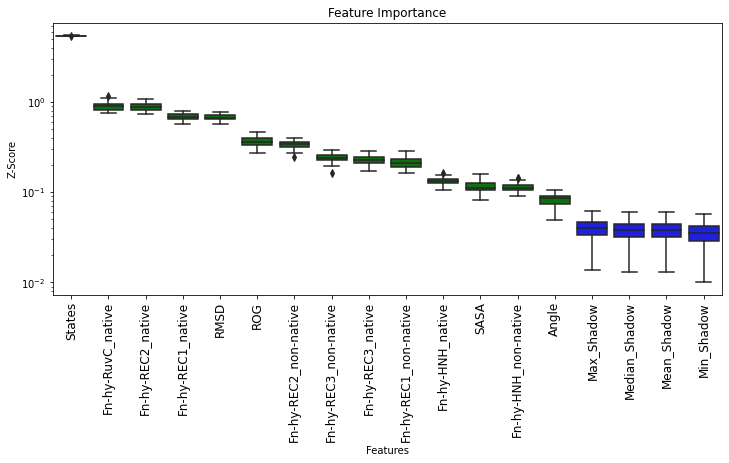

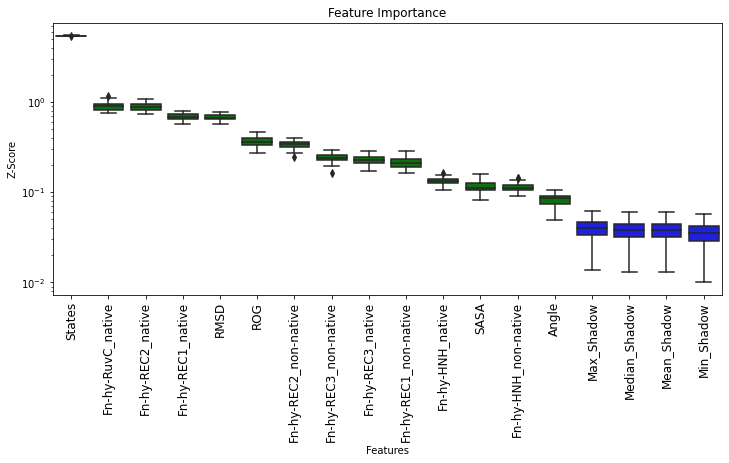

In [2]:
# Features selected for all
# Returns Boxplot of features
boruta_fn_prot.plot(X_size=12, figsize=(12,5),
            y_scale='log', which_features='all')
boruta_fn_prot.plot(X_size=12, figsize=(12,5),
            y_scale='log', which_features='accepted')

In [15]:
subset

,fn_all_bp19_propeller,Fn-ntDNA-tDNA_native,fn_all_bp19_shear,fn_all_bp17_propeller,fn_all_bp18_stagger,fn_all_bp17_stagger,fn_all_bp18_opening,fn_all_bp17_opening,fn_all_bp18_stretch,fn_all_bp17_buckle,...,fn_all_bp20_buckle,fn_all_bp18_buckle,LIE,sgRNA-tDNA cont,fn_all_bp20_stagger,fn_all_bp20_propeller,States,fn_all_bp20_opening,fn_all_bp18_propeller,fn_all_bp19_opening
50239,18.3500,343,0.2400,-20.9700,-0.1200,-1.1200,-0.8100,6.4800,0.1700,34.7200,...,-4.1300,35.2900,-410.0010,632.0,-0.5000,-18.1500,1,14.3900,14.5400,-8.0100
33231,-3.8507,322,0.0052,-7.3111,-0.2741,-1.0811,-1.3879,8.3839,-0.1660,-1.0382,...,-12.5705,9.4909,-452.4573,674.0,-0.8177,4.9969,3,-1.7846,-11.4391,-4.6107
43650,-0.5619,337,0.2641,-13.4788,-0.5387,0.1590,-2.9250,17.9479,-0.1099,-3.8561,...,-20.6091,-3.5647,-458.8838,702.0,-0.1641,-9.2743,3,-8.7081,-18.6731,3.2545
38836,-4.7369,308,0.6162,-21.7411,-0.9574,-0.5586,1.9307,13.7578,-0.1106,-22.5135,...,-37.2419,-26.7250,-433.8120,656.0,-0.9802,-27.4461,3,5.0804,-21.8295,-6.3110
2388,2.5035,352,-0.2936,-14.7552,-0.3286,-0.1554,1.3293,0.5698,0.0088,-11.1967,...,-10.2132,9.2225,-450.3133,675.0,-0.4708,-9.0658,2,-0.4881,-1.6209,2.0433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3.3837,371,0.0006,-8.6031,0.1292,-0.8834,-0.4725,10.9378,-0.1035,15.4200,...,-6.3721,15.9939,-437.6163,696.0,-0.1634,1.2125,2,6.6856,2.7380,-4.5912
44732,-5.5938,337,0.0289,-18.3620,-0.3569,-0.8004,4.9483,6.2273,-0.0184,5.8487,...,-1.8828,3.2311,-452.9091,643.0,-0.0435,-0.7602,3,-3.7980,-10.5564,-5.3009
38158,4.7446,297,-0.1459,-15.7882,-0.4733,-0.7406,2.3548,5.7456,-0.2809,14.7438,...,-16.9829,7.4215,-445.0587,708.0,-0.2712,-18.8301,3,2.7816,-6.2095,4.2263
860,-10.2218,349,0.2673,-23.0556,-0.0564,-1.1481,-0.7889,13.5627,-0.0614,16.6919,...,3.4269,6.4565,-426.7430,629.0,0.2367,-5.4566,3,-2.2644,-9.4731,-7.8802


In [10]:
# Difnlay features to be removed
all_features_to_remove = boruta_fn_all.features_to_remove
print(all_features_to_remove)
# Removes them
X_train_fn_all_shap = X_train.drop(columns = all_features_to_remove)
X_test_fn_all_shap = X_test.drop(columns = all_features_to_remove)

['fn_all_bp17_stretch']


In [ ]:
# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fn_all_shap)
X_test_scaled = scaler.transform(X_test_fn_all_shap)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict_fn_all = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=48)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict_fn_all[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|████████████████                                                                | 1/5 [04:27<17:48, 267.03s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score for RandomForestClassifier: 0.8991456257191214



Grid Search Progress:  40%|██████████████████████████████                                             | 2/5 [1:15:10<2:10:18, 2606.01s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Best score for GradientBoostingClassifier: 0.9006816007767867



Grid Search Progress:  60%|██████████████████████████████████████████████▏                              | 3/5 [1:16:22<48:18, 1449.08s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for AdaBoostClassifier: 0.8808323485825407



In [34]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict_fn_all[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict_fn_all[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict_fn_all[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict_fn_all[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict_fn_all[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


grid_bor_fn_all_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_bor_fn_all_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_bor_fn_all_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_bor_fn_all_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
bor_fn_all=pd.DataFrame(list(zip(models,grid_bor_fn_all_accuracy,grid_bor_fn_all_precision,grid_bor_fn_all_recall, grid_bor_fn_all_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
bor_fn_all.head()

Random Forest Precision: 0.88119037170173
Gradient Boosting Precision: 0.8814870847706188
AdaBoost Precision: 0.877108917797215
Support Vector Machine Precision: 0.8951526514005174
XGBoost Precision: 0.8840156005359966
Random Forest Recall: 0.8979454685099847
Gradient Boosting Recall: 0.9017857142857143
AdaBoost Recall: 0.8852726574500768
Support Vector Machine Recall: 0.9022657450076805
XGBoost Recall: 0.9034178187403994
Random Forest F1-score: 0.8585826035982269
Gradient Boosting F1-score: 0.8786499567222011
AdaBoost F1-score: 0.8357518377760655
Support Vector Machine F1-score: 0.866864540468343
XGBoost F1-score: 0.8811322608020317
Random Forest Accuracy: 0.8979454685099847
Gradient Boosting Accuracy: 0.9017857142857143
AdaBoost Accuracy: 0.8852726574500768
Support Vector Machine Accuracy: 0.9022657450076805
XGBoost Accuracy: 0.9034178187403994


,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.897945,0.881190,0.897945,0.858583
1,Gradient Boosting,0.901786,0.881487,0.901786,0.878650
2,ADA Boosting,0.885273,0.877109,0.885273,0.835752
3,Support-vector Machine,0.902266,0.895153,0.902266,0.866865
4,XG-Boost,0.903418,0.884016,0.903418,0.881132


In [35]:
# Assuming y_test, rf_pred, gb_pred, ab_pred, svm_pred, and xgb_pred are available

# Create a DataFrame with true labels and predictions
fn_all = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
fn_all.to_csv('fncas9_boruta_both_dna-prot.csv', index=False)

In [10]:
# Display features to be removed
dna_features_to_remove = boruta_fn_dna.features_to_remove
print(dna_features_to_remove)
# Removes them
X_train_fn_dna_shap = X_train.drop(columns = dna_features_to_remove)
X_test_fn_dna_shap = X_test.drop(columns = dna_features_to_remove)

[]


In [11]:
# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fn_dna_shap)
X_test_scaled = scaler.transform(X_test_fn_dna_shap)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict_fn_dna = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=48)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict_fn_dna[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████████████                                                                                            | 1/5 [05:02<20:09, 302.43s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.959173355425853



Grid Search Progress:  40%|████████████████████████████████████████████                                                                  | 2/5 [2:13:11<3:52:22, 4647.50s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9650298201779959



Grid Search Progress:  60%|██████████████████████████████████████████████████████████████████                                            | 3/5 [2:15:06<1:25:56, 2578.05s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for AdaBoostClassifier: 0.9036815912144215



Grid Search Progress:  80%|████████████████████████████████████████████████████████████████████████████████████████                      | 4/5 [4:43:49<1:24:42, 5082.71s/it]

Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.9635175321355953



Grid Search Progress: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [5:02:32<00:00, 3630.58s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score for XGBClassifier: 0.9666619085259545



In [14]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict_fn_dna[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict_fn_dna[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict_fn_dna[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict_fn_dna[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict_fn_dna[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest recall:", rf_recall)
print("Gradient Boosting recall:", gb_recall)
print("AdaBoost recall:", ab_recall)
print("Support Vector Machine recall:", svm_recall)
print("XGBoost recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


grid_bor_fn_dna_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_bor_fn_dna_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_bor_fn_dna_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_bor_fn_dna_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
bor_fn_dna=pd.DataFrame(list(zip(models,grid_bor_fn_dna_accuracy,grid_bor_fn_dna_precision,grid_bor_fn_dna_recall, grid_bor_fn_dna_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
bor_fn_dna.head()

Random Forest Precision: 0.9545875353355021
Gradient Boosting Precision: 0.9613972676499729
AdaBoost Precision: 0.9229087116002934
Support Vector Machine Precision: 0.9578959772694992
XGBoost Precision: 0.9640625020269128
Random Forest recall: 0.9570852534562212
Gradient Boosting recall: 0.9625576036866359
AdaBoost recall: 0.9083141321044547
Support Vector Machine recall: 0.9599654377880185
XGBoost recall: 0.9656298003072197
Random Forest F1-score: 0.9549943184946947
Gradient Boosting F1-score: 0.9617490303670897
AdaBoost F1-score: 0.9135883499283133
Support Vector Machine F1-score: 0.9585275896375203
XGBoost F1-score: 0.9646485359180655
Random Forest Accuracy: 0.9570852534562212
Gradient Boosting Accuracy: 0.9625576036866359
AdaBoost Accuracy: 0.9083141321044547
Support Vector Machine Accuracy: 0.9599654377880185
XGBoost Accuracy: 0.9656298003072197


,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.957085,0.954588,0.957085,0.954994
1,Gradient Boosting,0.962558,0.961397,0.962558,0.961749
2,ADA Boosting,0.908314,0.922909,0.908314,0.913588
3,Support-vector Machine,0.959965,0.957896,0.959965,0.958528
4,XG-Boost,0.965630,0.964063,0.965630,0.964649


In [15]:
# Assuming y_test, rf_pred, gb_pred, ab_pred, svm_pred, and xgb_pred are available

# Create a DataFrame with true labels and predictions
fn_dna = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
fn_dna.to_csv('spcas9_boruta_dna.csv', index=False)

In [11]:
# Display features to be removed
prot_features_to_remove = boruta_fn_prot.features_to_remove
print(prot_features_to_remove)
# Removes them
X_train_fn_prot_shap = X_train.drop(columns = prot_features_to_remove)
X_test_fn_prot_shap = X_test.drop(columns = prot_features_to_remove)

[]
